# Bank Marketing Campaign Project




## 1. Download data 

The Bank Marketing Campaign dataset can be downloaded from:
https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

## 2. Load library or packages

In [7]:
# Import modules
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import ydata_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import libraries for Data Standardization and Modeling with K-Means and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## 3. Read in data

In [8]:
bank_data = pd.read_csv(r"C:\Users\mandy\Desktop\bank_marketing_data\data_in_use\bank_full.csv", sep=';')

### 3.1 How does the data look like?


In [9]:
bank_data.shape

(45211, 17)

In [10]:
# show the first 10 rows of the data
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## 4. Data Cleansing

### 4.1 Create dta profile report

In [5]:
profile = pandas_profiling.ProfileReport(bank_data)
profile.to_file("bank_data_profile.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 55.74it/s]


### 4.2 Check for missing values

In [11]:
# check missing values
# How many missing data points do we have?

missing_value_count = bank_data.isnull().sum()
print(missing_value_count)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### 4.3 Check for Data Types

In [7]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### 4.4 Check for outliers

In [8]:
bank_data.describe()
print(bank_data.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.




There seems to be outliers in columns 'balance', 'duration', 'campaign', 'pdays'and 'previous'. 
It's important to examine these values more closely and consider whether they are valid or not. 

Upon careful examination and verification, it has been determined that the negative values in the 'balance' column and the extremely large values in the 'duration', 'campaign', and 'pdays' columns are not errors or outliers. Therefore, these values will be retained in the dataset for further analysis.



#### 4.4.1 Check  the 'previous' column for outliers

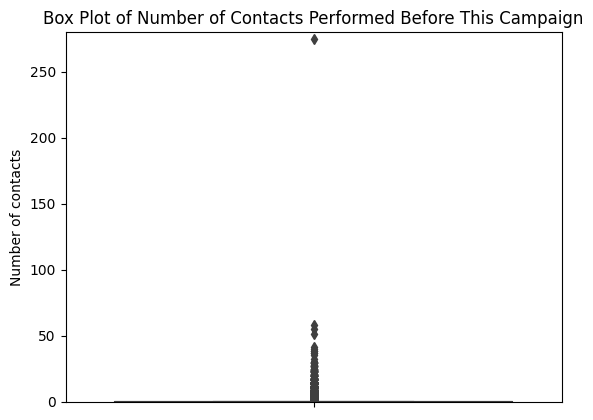

In [12]:
# create a box plot for the previous column
sns.boxplot(y=bank_data['previous'])
plt.title('Box Plot of Number of Contacts Performed Before This Campaign')
plt.ylabel('Number of contacts')
# set the y-axis limit to 280
plt.ylim(0, 280)
plt.show()

In [13]:
bank_data[bank_data['previous'] > 250]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,no


In [14]:
# remove the outlier (>250) in the previous column
bank_data = bank_data[bank_data['previous'] < 275]


After thorough investigation, it has been confirmed that there is a single extremely large value in the 'previous' column that is an error and should be removed from the dataset.

### 4.5 Check for duplicates in the Data

In [15]:
bank_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45210, dtype: bool

In [16]:
bank_data.duplicated().sum()

0

### 4.6 Rename columns

In [17]:
bank_data = bank_data.rename(columns={'contact': 'contact_type', 
                                     'y':'subscription'})

In [18]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact_type,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 4.7 Binarization

In [19]:
# To change 'yes' and 'no' values in the default column to 1 and 0 using map() method

mapping = {'yes': 1, 'no': 0}

# use the map() method to apply the mapping to the 'default' column
bank_data['subscription_binary'] = bank_data['subscription'].map(mapping)

# print the resulting DataFrame
bank_data

,age,job,marital,education,default,balance,housing,loan,contact_type,day,month,duration,campaign,pdays,previous,poutcome,subscription,subscription_binary
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0


## 5. Exploratory analysis

### 5.1 The number of subscriptions by different client demographic features

#### 5.1.1 Numer of subscriptions by age group

In [20]:
# create age groups

# create the bins for the age groups
bins = [17, 25, 35, 45, 55,65,75,85,95]
# (17, 25], (25,35]

# create the labels for the age groups
labels = ['17-25', '26-35', '36-45', '46-55','56-65','66-75','76-85','86-95']

# create a new column that groups the age values into the specified bins
bank_data['age_group'] = pd.cut(bank_data['age'], bins=bins, labels=labels)

# print the new DataFrame with the age groups
bank_data

,age,job,marital,education,default,balance,housing,loan,contact_type,day,month,duration,campaign,pdays,previous,poutcome,subscription,subscription_binary,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,56-65
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,36-45
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,26-35
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,46-55
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1,46-55
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1,66-75
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1,66-75
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,56-65


In [21]:
bank_data['age_group'].value_counts()

26-35    15571
36-45    13855
46-55     9548
56-65     4149
17-25     1336
66-75      490
76-85      234
86-95       27
Name: age_group, dtype: int64

In [22]:
age_group_subscriptions = bank_data.groupby('age_group')['subscription_binary'].sum().reset_index()
print(age_group_subscriptions)

  age_group  subscription_binary
0     17-25                  320
1     26-35                 1869
2     36-45                 1301
3     46-55                  893
4     56-65                  586
5     66-75                  203
6     76-85                  103
7     86-95                   14


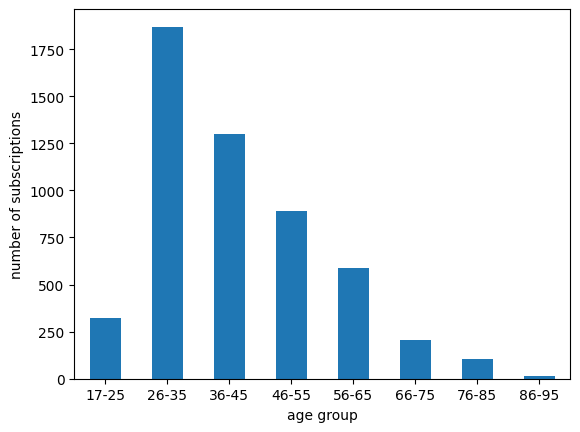

In [23]:
# count the number of subscriptions in each age group
age_subs = bank_data.groupby('age_group')['subscription_binary'].sum()

# create a bar chart
age_subs.plot(kind='bar', rot=0, xlabel='age group', ylabel='number of subscriptions', grid=False)
plt.show()

#### 5.1.2 Numer of subscriptions by job

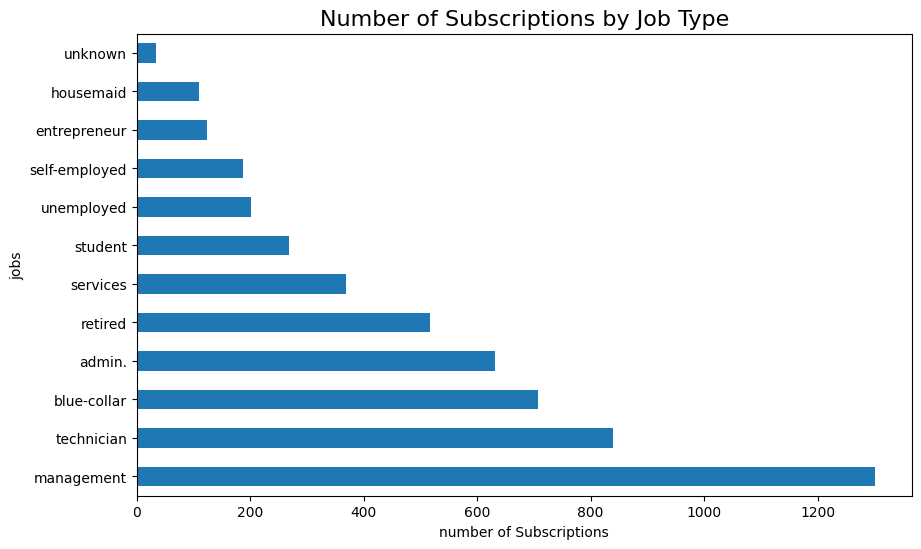

In [24]:
import matplotlib.pyplot as plt

# Count the number of subscriptions in each job type
job_subs = bank_data.groupby('job')['subscription_binary'].sum()

# Sort the Series in descending order
job_subs_sorted = job_subs.sort_values(ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
ax = job_subs_sorted.plot(kind='barh', xlabel='number of Subscriptions', ylabel='jobs', grid = False)
ax.set_title('Number of Subscriptions by Job Type', fontsize=16)

# Display the chart
plt.show()


#### 5.1.3 Numer of subscriptions by education

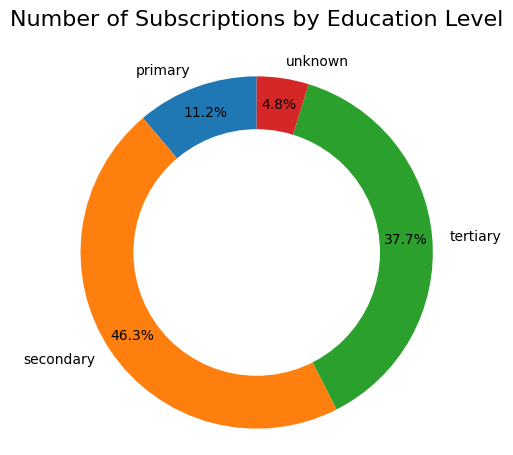

In [25]:
import matplotlib.pyplot as plt

# Count the number of subscriptions in each education level
edu_subs = bank_data.groupby('education')['subscription_binary'].sum()

# Create a donut chart
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(edu_subs.values, labels=edu_subs.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, labeldistance=1.1)
ax.axis('equal')
inner_circle = plt.Circle((0, 0), 0.7, fc='white')
fig.gca().add_artist(inner_circle)
ax.set_title('Number of Subscriptions by Education Level', fontsize=16, pad = 25)

plt.show()


#### 5.1.4 Number of subscriptions by marital

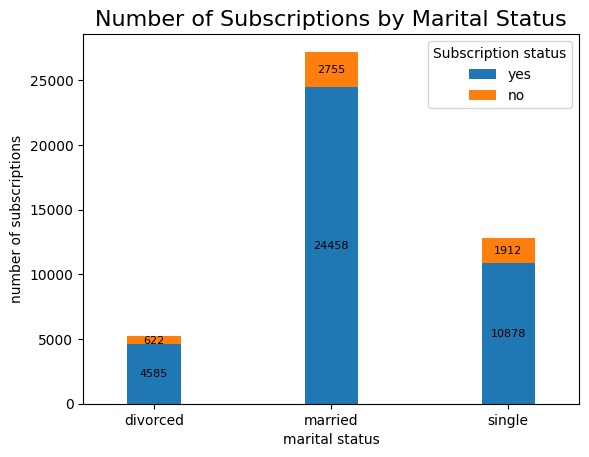

In [26]:
import matplotlib.pyplot as plt

# Group the data by marital status and subscription status
marital_subs = bank_data.groupby(['marital', 'subscription'])['subscription'].count()

# Create a stacked bar chart
bar_plot = marital_subs.unstack().plot(kind='bar', stacked=True, rot=0, xlabel='marital status', ylabel='number of subscriptions', width=0.3, grid=False)

# Add a title
plt.title('Number of Subscriptions by Marital Status', fontsize=16)

# Add a legend
bar_plot.legend(['yes', 'no'], title='Subscription status')

# Add labels to the center of each bar
for i in bar_plot.containers:
    bar_plot.bar_label(i, label_type='center', fontsize=8)
    
    

# Display the chart
plt.show()


###  5.2 Subscription rate by age_group

In [27]:
# filter dataframe to include only rows with 'yes' subscription
subscribed_df = bank_data[bank_data['subscription']=='yes']

# calculate subscription rate for each age group
age_group_subs = subscribed_df.groupby('age_group')['subscription'].count() / bank_data.groupby('age_group')['subscription'].count() * 100

# print the subscription rate for each age group
print(age_group_subs)

age_group
17-25    23.952096
26-35    12.003083
36-45     9.390112
46-55     9.352744
56-65    14.123885
66-75    41.428571
76-85    44.017094
86-95    51.851852
Name: subscription, dtype: float64


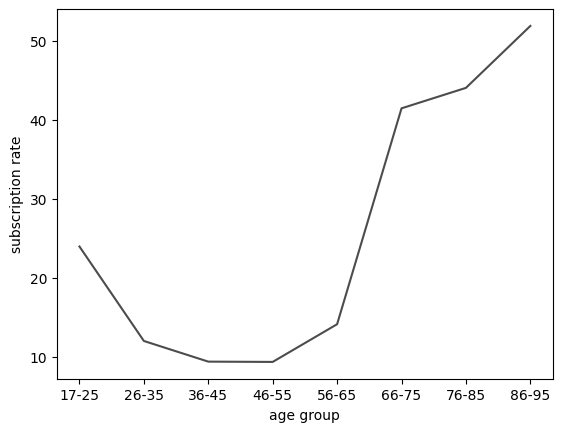

In [28]:
# filter dataframe to include only rows with 'yes' subscription
subscribed_df = bank_data[bank_data['subscription']=='yes']

# calculate subscription rate for each age group
age_group_subs = subscribed_df.groupby('age_group')['subscription'].count() / bank_data.groupby('age_group')['subscription'].count() * 100

# create the figure and axes objects
fig, ax = plt.subplots()

# create the line chart with marks on the lines
age_group_subs.plot(kind='line', marker='', ax=ax, xlabel='age group', ylabel='subscription rate', grid=False, color='black', alpha=0.7)

# show the chart
plt.show()


After comparint this chart with the chart 'The Number of Subscription by Age Groups', it is evident that the age groups of '26-35', '36-45', and '46-55' have the largest number of subscriptions. However, these age groups have the lowest subscription rates. Let's explore this observation in greater detail.

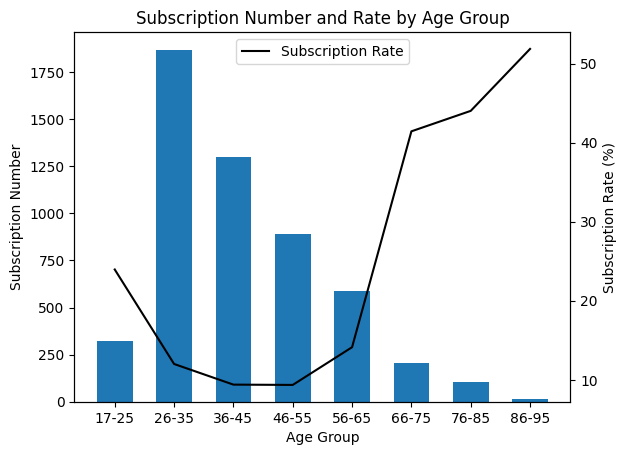

In [33]:
# create the bins for the age groups
bins = [17, 25, 35, 45, 55, 65, 75, 85, 95]

# create the labels for the age groups
labels = ['17-25', '26-35', '36-45', '46-55','56-65','66-75','76-85','86-95']

# create a new column that groups the age values into the specified bins
bank_data['age_group'] = pd.cut(bank_data['age'], bins=bins, labels=labels)

# calculate the subscription number and subscription rate by age group
age_sub_num = bank_data[bank_data['subscription'] == 'yes'].groupby('age_group')['subscription'].count()
age_sub_rate = bank_data.groupby('age_group')['subscription_binary'].mean() * 100

# create the chart
fig, ax1 = plt.subplots()

# plot the subscription number as a bar chart
color1 = 'tab:blue'
color2 = 'black'
ax1.bar(age_sub_num.index, age_sub_num, color=color1, width=0.6)
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Subscription Number', color=color2)
ax1.tick_params(axis='y', labelcolor=color2)

# plot the subscription rate as a line chart
ax2 = ax1.twinx()
ax2.plot(age_sub_rate.index, age_sub_rate, color=color2, marker='', label='Subscription Rate')
ax2.set_ylabel('Subscription Rate (%)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# set the chart title and legend
plt.title('Subscription Number and Rate by Age Group')
plt.legend()
ax2.legend(loc='upper center')

# hide the grid lines
# hide the grid lines
# hide the grid lines
ax1.grid(False)
ax2.grid(False)

# show the chart
plt.show()

It is evident that the age groups of '26-35', '36-45', and '46-55' have the largest number of subscriptions. However, these age groups have the lowest subscription rates. Let's explore this observation in greater detail.

It is worthwhile to analyze the subscription behavior within each age group later. 

## 6. Customer Segmentation

In [34]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45210 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45210 non-null  int64   
 1   job                  45210 non-null  object  
 2   marital              45210 non-null  object  
 3   education            45210 non-null  object  
 4   default              45210 non-null  object  
 5   balance              45210 non-null  int64   
 6   housing              45210 non-null  object  
 7   loan                 45210 non-null  object  
 8   contact_type         45210 non-null  object  
 9   day                  45210 non-null  int64   
 10  month                45210 non-null  object  
 11  duration             45210 non-null  int64   
 12  campaign             45210 non-null  int64   
 13  pdays                45210 non-null  int64   
 14  previous             45210 non-null  int64   
 15  poutcome           

### 6.1 Convert string data to numerical data

Convert string data in the 'housing','default','loan' columns to numerical data

In [35]:
# To change 'yes' and 'no' values in the housing column to 1 and 0 using map() method
mapping = {'yes': 1, 'no': 0}

# use the map() method to apply the mapping to the 'housing' column
bank_data['housing_binary'] = bank_data['housing'].map(mapping)

# use the map() method to apply the mapping to the 'loan' column
bank_data['loan_binary'] = bank_data['loan'].map(mapping)

# use the map() method to apply the mapping to the 'default' column
bank_data['default_binary'] = bank_data['default'].map(mapping)


Convert string data in the 'education' column to numerical data

In [36]:
# To change 'yes' and 'no' values in the education column to 1 and 0 using map() method
mapping = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}

# use the map() method to apply the mapping to the 'education' column
bank_data['education_numeric'] = bank_data['education'].map(mapping)


Convert string data in the 'marital' column to numerical data

In [37]:
# To change 'yes' and 'no' values in the marital column to 1 and 0 using map() method
mapping = {'single': 0, 'married': 1, 'divorced': 2}

# use the map() method to apply the mapping to the 'marital' column
bank_data['marital_numeric'] = bank_data['marital'].map(mapping)

Convert string data in the 'job' column to numerical data

In [38]:
# To change 'yes' and 'no' values in the job column to 1 and 0 using map() method
mapping = {'unemployed': 1, 'student': 1, 'housemaid': 3, 'unknown': 0, 'admin.': 2, 'services': 2, 'technician': 3, 'management': 4, 'entrepreneur': 4, 'self-employed': 4, 'retired': 5, 'blue-collar': 3}

# use the map() method to apply the mapping to the 'job' column
bank_data['job_numeric'] = bank_data['job'].map(mapping)

### 6.2 Create a new dataframe with the numerical data

In [39]:
bank_numeric = bank_data.loc[:,['age','job_numeric','marital_numeric','education_numeric', 'default_binary', 'balance','housing_binary', 'loan_binary']]
bank_numeric

,age,job_numeric,marital_numeric,education_numeric,default_binary,balance,housing_binary,loan_binary
0,58,4,1,3,0,2143,1,0
1,44,3,0,2,0,29,1,0
2,33,4,1,2,0,2,1,1
3,47,3,1,0,0,1506,1,0
4,33,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
45206,51,3,1,3,0,825,0,0
45207,71,5,2,1,0,1729,0,0
45208,72,5,1,2,0,5715,0,0
45209,57,3,1,2,0,668,0,0


### 6.3 Standardize the values

Standardize the values in the 'bank_numeric' dataframe

In [40]:
scaler = StandardScaler()
bank_std = scaler.fit_transform(bank_numeric)
bank_std

array([[ 1.60694537,  0.97899964,  0.27576506, ...,  0.25641067,
         0.8939332 , -0.43680922],
       [ 0.28852415, -0.05440157, -1.36835182, ..., -0.43789615,
         0.8939332 , -0.43680922],
       [-0.74737823,  0.97899964,  0.27576506, ..., -0.44676384,
         0.8939332 ,  2.28932895],
       ...,
       [ 2.92536659,  2.01240084,  0.27576506, ...,  1.42957244,
        -1.11865182, -0.43680922],
       [ 1.51277243, -0.05440157,  0.27576506, ..., -0.22802763,
        -1.11865182, -0.43680922],
       [-0.37068646,  0.97899964,  0.27576506, ...,  0.52835298,
        -1.11865182, -0.43680922]])

Create a new dataframe 'bank_std' for the standardized data in 'bank_std

In [41]:
bank_std = pd.DataFrame(data = bank_std,columns = bank_numeric.columns)
bank_std

,age,job_numeric,marital_numeric,education_numeric,default_binary,balance,housing_binary,loan_binary
0,1.606945,0.979000,0.275765,1.206517,-0.135491,0.256411,0.893933,-0.436809
1,0.288524,-0.054402,-1.368352,-0.077689,-0.135491,-0.437896,0.893933,-0.436809
2,-0.747378,0.979000,0.275765,-0.077689,-0.135491,-0.446764,0.893933,2.289329
3,0.571043,-0.054402,0.275765,-2.646100,-0.135491,0.047199,0.893933,-0.436809
4,-0.747378,-3.154605,-1.368352,-2.646100,-0.135491,-0.447092,-1.118652,-0.436809
...,...,...,...,...,...,...,...,...
45205,0.947735,-0.054402,0.275765,1.206517,-0.135491,-0.176464,-1.118652,-0.436809
45206,2.831194,2.012401,1.919882,-1.361895,-0.135491,0.120440,-1.118652,-0.436809
45207,2.925367,2.012401,0.275765,-0.077689,-0.135491,1.429572,-1.118652,-0.436809
45208,1.512772,-0.054402,0.275765,-0.077689,-0.135491,-0.228028,-1.118652,-0.436809


Transform the standardized data in bank_std back to the original scale

In [42]:
bank_orig = scaler.inverse_transform(bank_std)

# The resulting data is then stored in a new dataframe called 'bank_orig_df'
bank_orig_df = pd.DataFrame(data = bank_orig, columns= bank_numeric.columns)
bank_orig_df

,age,job_numeric,marital_numeric,education_numeric,default_binary,balance,housing_binary,loan_binary
0,58.0,4.0,1.0,3.0,0.0,2143.0,1.0,0.0
1,44.0,3.0,0.0,2.0,0.0,29.0,1.0,0.0
2,33.0,4.0,1.0,2.0,0.0,2.0,1.0,1.0
3,47.0,3.0,1.0,0.0,0.0,1506.0,1.0,0.0
4,33.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
45205,51.0,3.0,1.0,3.0,0.0,825.0,0.0,0.0
45206,71.0,5.0,2.0,1.0,0.0,1729.0,0.0,0.0
45207,72.0,5.0,1.0,2.0,0.0,5715.0,0.0,0.0
45208,57.0,3.0,1.0,2.0,0.0,668.0,0.0,0.0


### 6.4 Cluster the clients into 4 groups using KMeans clustering

In [43]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(bank_std)
# df_segm_kmeans= bank_std.copy()

#  the cluster labels assigned by KMeans are added to the bank_std DataFrame as a new column called 'segment_K_means'
bank_std['segment_K_means'] = kmeans.labels_
bank_std

C:\Users\mandy\.conda\envs\Mandy_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,age,job_numeric,marital_numeric,education_numeric,default_binary,balance,housing_binary,loan_binary,segment_K_means
0,1.606945,0.979000,0.275765,1.206517,-0.135491,0.256411,0.893933,-0.436809,2
1,0.288524,-0.054402,-1.368352,-0.077689,-0.135491,-0.437896,0.893933,-0.436809,1
2,-0.747378,0.979000,0.275765,-0.077689,-0.135491,-0.446764,0.893933,2.289329,0
3,0.571043,-0.054402,0.275765,-2.646100,-0.135491,0.047199,0.893933,-0.436809,2
4,-0.747378,-3.154605,-1.368352,-2.646100,-0.135491,-0.447092,-1.118652,-0.436809,1
...,...,...,...,...,...,...,...,...,...
45205,0.947735,-0.054402,0.275765,1.206517,-0.135491,-0.176464,-1.118652,-0.436809,2
45206,2.831194,2.012401,1.919882,-1.361895,-0.135491,0.120440,-1.118652,-0.436809,2
45207,2.925367,2.012401,0.275765,-0.077689,-0.135491,1.429572,-1.118652,-0.436809,2
45208,1.512772,-0.054402,0.275765,-0.077689,-0.135491,-0.228028,-1.118652,-0.436809,2


In [44]:
bank_std.to_csv('data_segment.csv')

### 6.5 Calculates the mean values for each of the four segments

In [45]:
df_segm_analysis = bank_std.groupby(['segment_K_means']).mean()
df_segm_analysis

,age,job_numeric,marital_numeric,education_numeric,default_binary,balance,housing_binary,loan_binary
segment_K_means,,,,,,,,
0,-0.033800,-0.007639,0.107776,0.013181,-0.135491,-0.185927,0.109086,2.289329
1,-0.672284,-0.191171,-0.578566,0.236074,-0.135491,-0.055904,0.184431,-0.436809
2,0.804579,0.223831,0.629666,-0.277728,-0.135491,0.163143,-0.256997,-0.436178
3,-0.131961,0.050841,0.051842,-0.066659,7.380541,-0.492621,-0.044450,0.570022


Transform the standardized data back to its original scale

In [46]:
bank_orig_analysis = scaler.inverse_transform(df_segm_analysis)
bank_orig_analysis_df = pd.DataFrame(data = bank_orig_analysis, columns = bank_numeric.columns)
bank_orig_analysis_df


,age,job_numeric,marital_numeric,education_numeric,default_binary,balance,housing_binary,loan_binary
0,40.577317,3.045251,0.897824,2.070759,0.0,796.187491,0.610030,1.000000
1,33.797413,2.867651,0.480371,2.244324,0.0,1192.076584,0.647467,0.000000
2,49.479863,3.269240,1.215253,1.844231,0.0,1859.021236,0.428133,0.000231
3,39.534969,3.101840,0.863804,2.008589,1.0,-137.624540,0.533742,0.369325


### 6.6 Interprete the new dataset 'bank_orig_analysis_df'

0:'middle-aged clients with loans'

1:'younger clients with higher education level and no loans'

2:'older clients with loans '

3:'clients with credit default, housing loan and negative balance'

In [47]:
# label the segment according to their relevance

bank_orig_analysis_df.rename({0:'middle-aged clients with loans',
                         1:'younger clients with higher education level and no loans',
                         2:'older clients with loans ',
                         3:'clients with credit default, housing loan and negative balance'})

,age,job_numeric,marital_numeric,education_numeric,default_binary,balance,housing_binary,loan_binary
middle-aged clients with loans,40.577317,3.045251,0.897824,2.070759,0.0,796.187491,0.610030,1.000000
younger clients with higher education level and no loans,33.797413,2.867651,0.480371,2.244324,0.0,1192.076584,0.647467,0.000000
older clients with loans,49.479863,3.269240,1.215253,1.844231,0.0,1859.021236,0.428133,0.000231
"clients with credit default, housing loan and negative balance",39.534969,3.101840,0.863804,2.008589,1.0,-137.624540,0.533742,0.369325


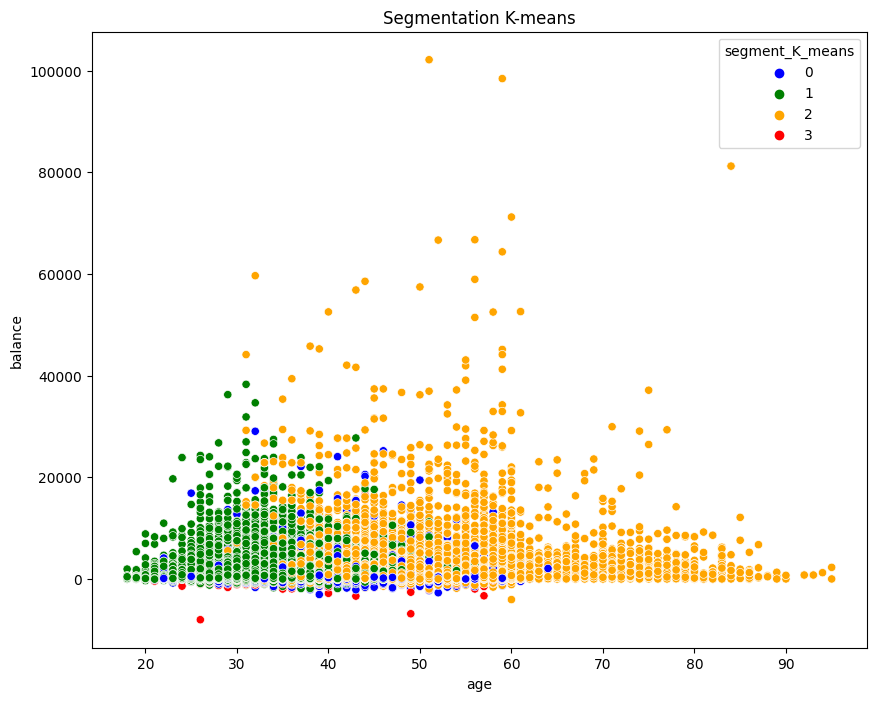

In [48]:
# Create a scatter plot to show how the data points are grouped into the four segments

x_axis = bank_orig_df['age']
y_axis = bank_orig_df['balance']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue = bank_std['segment_K_means'], palette = ['blue', 'green', 'orange', 'red'])
plt.title('Segmentation K-means')
plt.show()

## 7.Subscription rate by client segment

In [49]:
bank_data['segment_K_means'] = bank_std['segment_K_means']
bank_data

,age,job,marital,education,default,balance,housing,loan,contact_type,day,...,subscription,subscription_binary,age_group,housing_binary,loan_binary,default_binary,education_numeric,marital_numeric,job_numeric,segment_K_means
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,no,0,56-65,1,0,0,3,1,4,2.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,no,0,36-45,1,0,0,2,0,3,1.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,no,0,26-35,1,1,0,2,1,4,0.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,no,0,46-55,1,0,0,0,1,3,2.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,no,0,26-35,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,yes,1,46-55,0,0,0,3,1,3,2.0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,yes,1,66-75,0,0,0,1,2,5,2.0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,yes,1,66-75,0,0,0,2,1,5,2.0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,no,0,56-65,0,0,0,2,1,3,2.0


In [50]:
# calculate the subscription number and subscription rate by age group

seg_sub_num = bank_data[bank_data['subscription'] == 'yes'].groupby('segment_K_means')['subscription'].count()
seg_sub_rate = bank_data.groupby('segment_K_means')['subscription_binary'].mean() * 100

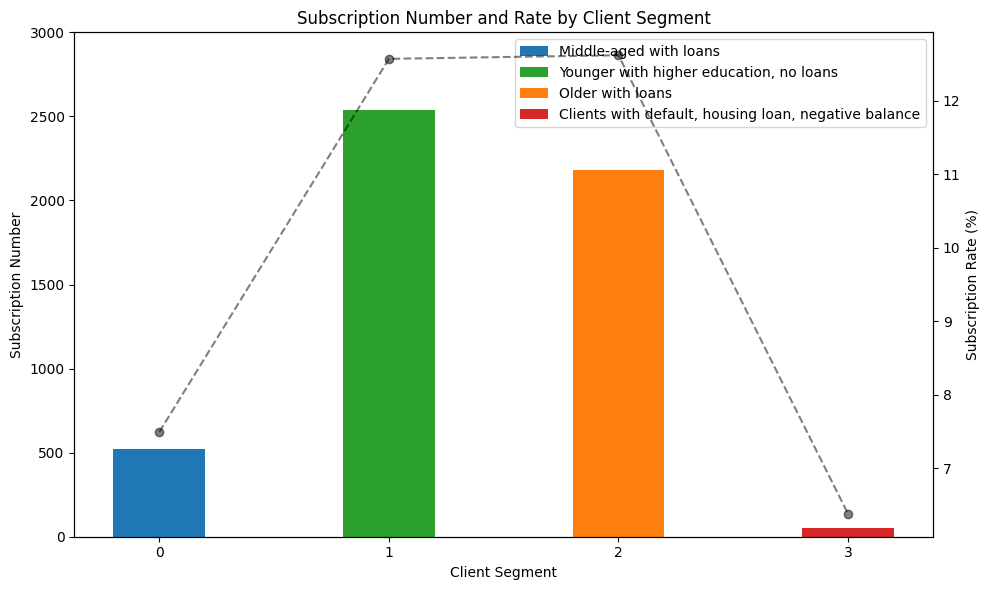

In [51]:
# create the chart
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 6)

# plot the subscription number as a bar chart with different colors
colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']
bars = ax1.bar(seg_sub_num.index, seg_sub_num, color=colors, width=0.4)

# add legend for the bar chart
legend_dict = {0:'Middle-aged with loans',  # fix typo in segment label
               1:'Younger with higher education, no loans',
               2:'Older with loans',
               3:'Clients with default, housing loan, negative balance'}  # use consistent spelling
ax1.legend(bars, legend_dict.values())

ax1.set_xlabel('Client Segment')
ax1.set_ylabel('Subscription Number')
ax1.grid(False)

# plot the subscription rate as a line chart
ax2 = ax1.twinx()
color2 = 'black'
ax2.plot(seg_sub_rate.index, seg_sub_rate, color=color2, marker='o', label='Subscription Rate', alpha=0.5, linestyle='--')
ax2.set_ylabel('Subscription Rate (%)', color=color2)
ax2.grid(False)
# set the chart title
plt.title('Subscription Number and Rate by Client Segment')

# set x-axis ticks
ax1.set_xticks([0, 1, 2, 3])

ax1.set_ylim([0, 3000])  # set appropriate y-axis range

plt.tight_layout()  # fix any overlapping of the axis labels and titles

# show the chart
plt.show()


### Insights: 


Segment 1 has both the highest subscription number and the highest subscription rate, indicating that younger clients with higher education level and no loans are the most likely to subscribe to the bank's term deposit.

Segment 2 has higher subscription number and subscription rate. They are also very likey to subscribe to the bank's term deposit.

Segmemt 3 has the lowest subscription number and rate. Clients in this segment are those .with with credit default, housing loan and negative balance


## 8.  Subscription Rate by Campaign Strategies

### 8.1 Subscription rate by contact type

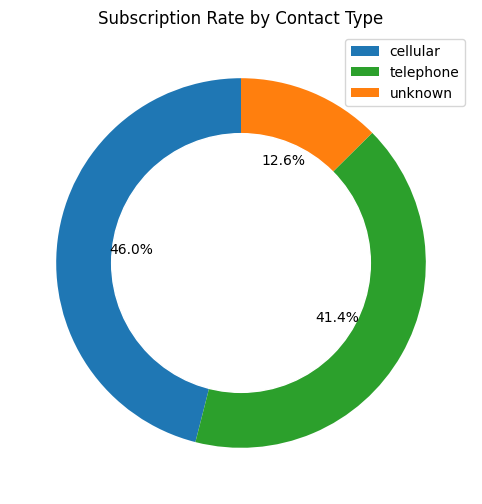

In [52]:
# group the data by contact type and calculate the mean of subscription rate in each group
contact_type_sub_rate = bank_data.groupby('contact_type')['subscription_binary'].mean() * 100

# define the colors for the bars
colors = ['tab:blue', 'tab:green', 'tab:orange']

# create the chart
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# create a white circle at the center of the chart to make a hole for the donut chart
my_circle=plt.Circle((0,0), 0.7, color='white')

# plot the pie chart with different colors and add the white circle in the middle
wedges, texts, autotexts = ax.pie(contact_type_sub_rate.values, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5))
ax.add_artist(my_circle)

# create a list of labels for the legend
labels = ['Cellular', 'Telephone', 'Unknown']

# add the legend
ax.legend(wedges, contact_type_sub_rate.index, loc="best")

# set the chart title
plt.title('Subscription Rate by Contact Type')

plt.show()


#### 8.1.1 The effectiveness of contact type (cellular or telephone) on client segments

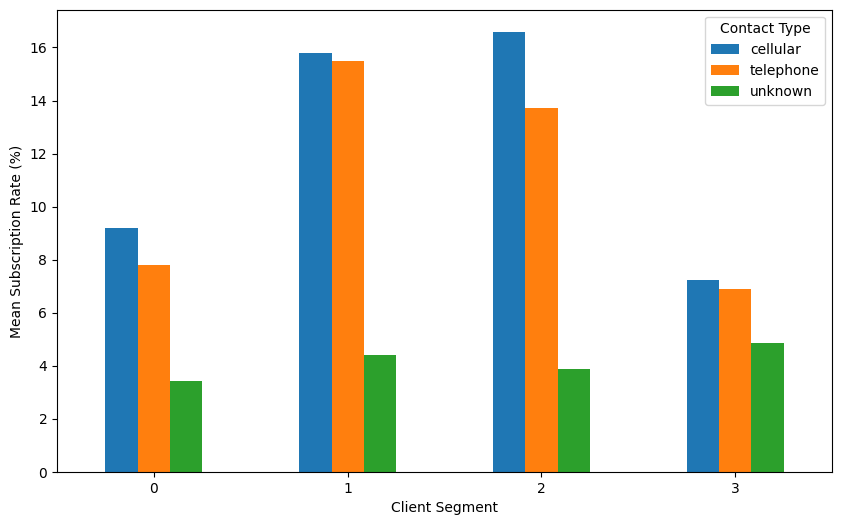

In [72]:
# group the data by segment_K_means and contact, and calculate the mean subscription rate
sub_rate = bank_data.groupby(['segment_K_means', 'contact_type'])['subscription_binary'].mean().unstack()*100

# plot the bar chart
sub_rate.plot(kind='bar', rot=0, figsize=(10,6), grid=False)

# set the axis labels and legend
plt.xlabel('Client Segment')
plt.ylabel('Mean Subscription Rate (%)')
plt.legend(title='Contact Type', loc='upper right')
plt.xticks([0, 1, 2, 3], [int(i) for i in [0, 1, 2, 3]])
plt.show()

### 8.2 Any relationship between subscription rate and last contact DAY of month?

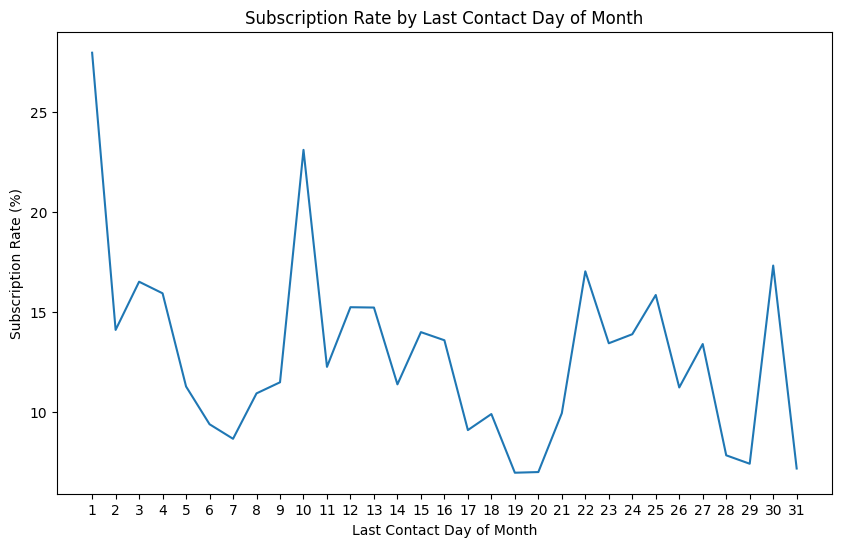

In [54]:
# group the data by day and calculate the mean of subscription rate in each group
day_sub_rate = bank_data.groupby('day')['subscription_binary'].mean() * 100

# create the chart
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# plot the line with blue color and markers
line = ax.plot(day_sub_rate.index, day_sub_rate.values, color='tab:blue', marker='')

ax.set_xlabel('Last Contact Day of Month')
ax.set_ylabel('Subscription Rate (%)')
plt.title('Subscription Rate by Last Contact Day of Month')

# set x-axis ticks to show values 1 to 31
ax.set_xticks(range(1, 32))

# hide the grid
ax.grid(False)

plt.show()


It seems that people are more likely to subscribe to a term deposit when they are contacted on certain days of the month, such as the first day or the 10th, 22nd, and 30th days. It is possible that people's financial situations or obligations vary throughout the month, and these variations affect their willingness or ability to subscribe to a term deposit.

### 8.3 Any relationship between subscription rate and last contact MONTH of year?

In [55]:
# create a dictionary that maps month names to integers
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
             'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

# use the map() method to apply the mapping to the "month" column
bank_data['month_int'] = bank_data['month'].map(month_map)

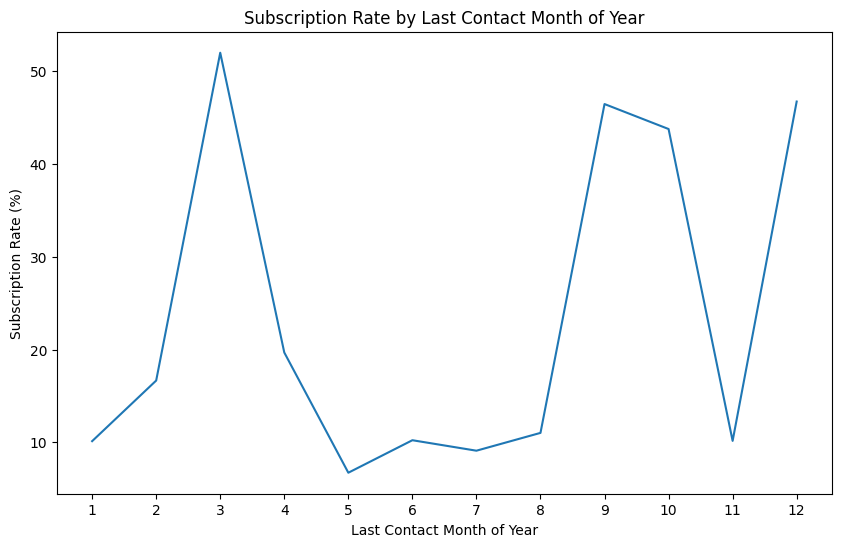

In [56]:
# group the data by day and calculate the mean of subscription rate in each group
day_sub_rate = bank_data.groupby('month_int')['subscription_binary'].mean() * 100

# create the chart
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# plot the line with blue color and markers
line = ax.plot(day_sub_rate.index, day_sub_rate.values, color='tab:blue', marker='')

ax.set_xlabel('Last Contact Month of Year')
ax.set_ylabel('Subscription Rate (%)')
plt.title('Subscription Rate by Last Contact Month of Year')

# set x-axis ticks to show values 1 to 13
ax.set_xticks(range(1, 13))

# hide the grid
ax.grid(False)

plt.show()

The chart shows that March, Sept, October and December has higher subscription rate. It's difficult to draw concrete conclusions without more context.

### 8.4 Any relationship between subscription rate and duration?

In [57]:
bank_data.duration.describe()

count    45210.000000
mean       258.161071
std        257.530306
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

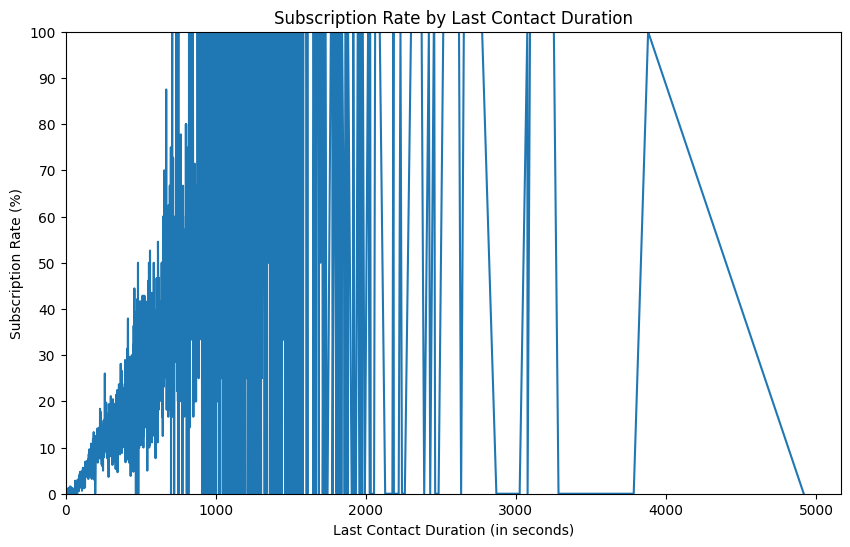

In [74]:
# group the data by duration and calculate the total number of subscription in each group
duration_sub_rate = bank_data.groupby('duration')['subscription_binary'].mean() * 100

# create the chart
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# plot the line
ax.plot(duration_sub_rate.index, duration_sub_rate.values)

ax.set_xlabel('Last Contact Duration (in seconds)')
ax.set_ylabel('Subscription Rate (%)')
plt.title('Subscription Rate by Last Contact Duration')

# set y-axis to display only integer values
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlim(left=0)
ax.set_ylim([0, 100])

plt.show()

Use "Winsorization" to remove the outliers and select the most valuable data. 

Winsorization is a data transformation technique that limits extreme values in your data by replacing them with a less extreme value.


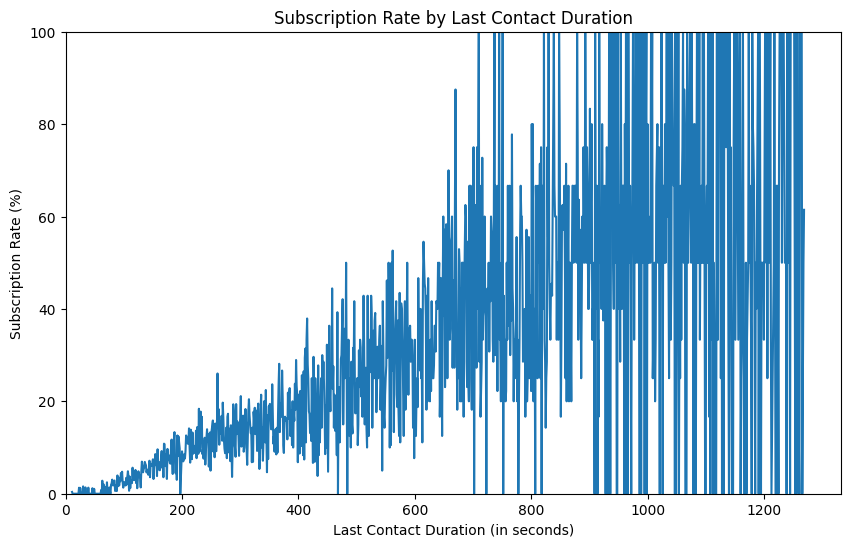

In [75]:
# Calculate the 1st and 99th percentiles of the duration column
p1 = bank_data['duration'].quantile(0.01)
p99 = bank_data['duration'].quantile(0.99)

# Apply Winsorization to the duration column
bank_data['duration_winsorized'] = bank_data['duration'].clip(lower=p1, upper=p99)

# Create a line chart with the winsorized duration values
duration_sub_rate = bank_data.groupby('duration_winsorized')['subscription_binary'].mean() * 100

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(duration_sub_rate.index, duration_sub_rate.values)

ax.set_xlim(left=0)
ax.set_ylim([0, 100])

ax.set_xlabel('Last Contact Duration (in seconds)')
ax.set_ylabel('Subscription Rate (%)')
plt.title('Subscription Rate by Last Contact Duration')

plt.show()


The chart indicates that the phone call duration is positively correlated with the likelihood of a customer subscribing to the product. As the phone call duration increases, the subscription rate also increases. This suggests that taking the time to have a longer conversation with potential customers can be more effective in persuading them to subscribe to the product. 

### 8.5 Any relationship between subscription rate and campaign?

In [76]:
bank_data.campaign.describe()

count    45210.000000
mean         2.763858
std          3.098053
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

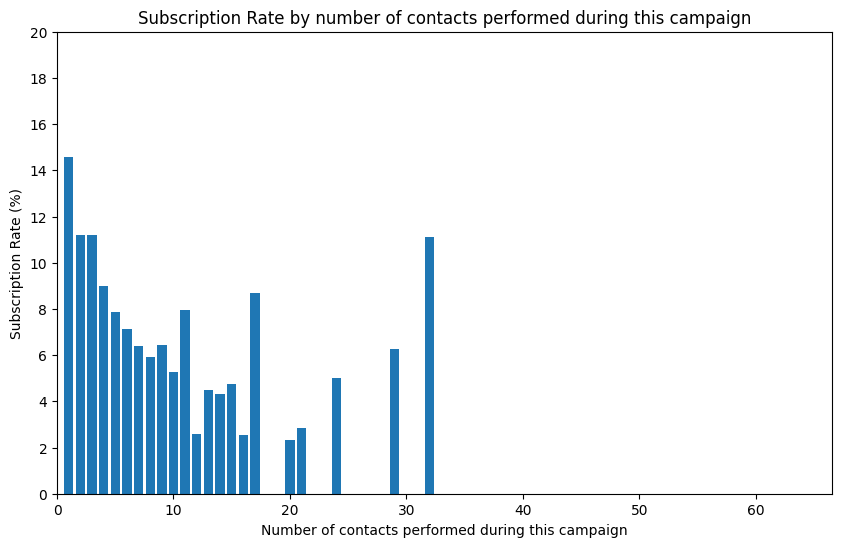

In [77]:
# group the data by campaign and calculate the total number of subscription in each group
campaign_sub_rate = bank_data.groupby('campaign')['subscription_binary'].mean() * 100

# create the chart
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# plot the bars
ax.bar(campaign_sub_rate.index, campaign_sub_rate.values)

ax.set_xlabel('Number of contacts performed during this campaign')
ax.set_ylabel('Subscription Rate (%)')
plt.title('Subscription Rate by number of contacts performed during this campaign')

# set y-axis to display only integer values
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlim(left=0)
ax.set_ylim([0, 20])

plt.show()


The chart shows no positive correlation between the number of contacts and subscription rate

### 8.6 Any relationship between subscription rate and pdays?

In [78]:
bank_data.pdays.min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
45206     -1
45207     -1
45208    184
45209     -1
45210    188
Name: pdays, Length: 45210, dtype: int64>

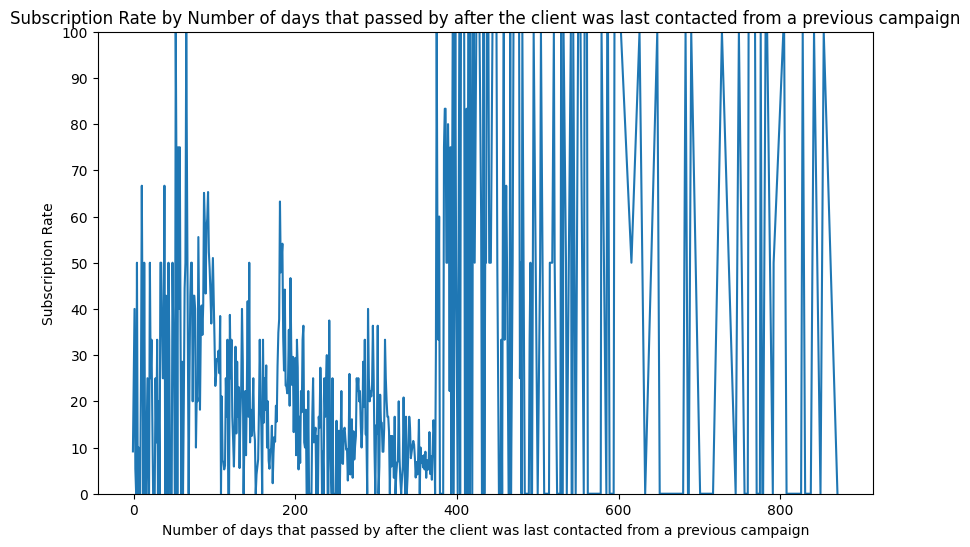

In [79]:
# group the data by pdays and calculate the total number of subscription in each group
pdays_sub_rate = bank_data.groupby('pdays')['subscription_binary'].mean() * 100

# create the chart
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# plot the line
ax.plot(pdays_sub_rate.index, pdays_sub_rate.values)

ax.set_xlabel('Number of days that passed by after the client was last contacted from a previous campaign')
ax.set_ylabel('Subscription Rate')
plt.title('Subscription Rate by Number of days that passed by after the client was last contacted from a previous campaign')

# set y-axis to display only integer values

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim([0, 100])
plt.show()


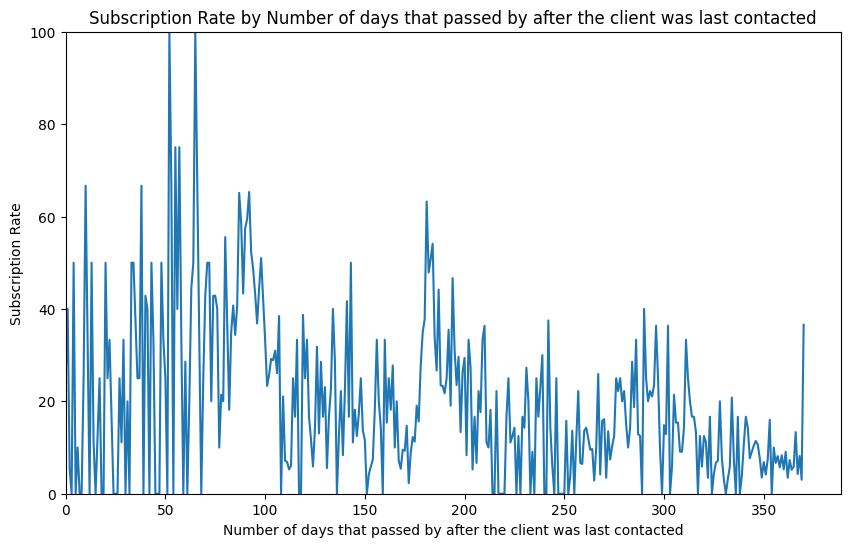

In [80]:
# Calculate the 1st and 99th percentiles of the duration column
p1 = bank_data['pdays'].quantile(0.01)
p99 = bank_data['pdays'].quantile(0.99)

# Apply Winsorization to the duration column
bank_data['pdays_winsorized'] = bank_data['pdays'].clip(lower=p1, upper=p99)

# Create a line chart with the winsorized duration values
pdays_sub_rate = bank_data.groupby('pdays_winsorized')['subscription_binary'].mean() * 100

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(pdays_sub_rate.index, pdays_sub_rate.values)

ax.set_xlim(left=0)
ax.set_ylim([0, 100])

ax.set_xlabel('Number of days that passed by after the client was last contacted')
ax.set_ylabel('Subscription Rate')
plt.title('Subscription Rate by Number of days that passed by after the client was last contacted')

plt.show()


The data shows that the less the number of days that passed by after the client was last contacted, the higher the subscription rate is.

### 8.7 Any relationship between subscription rate and previous?

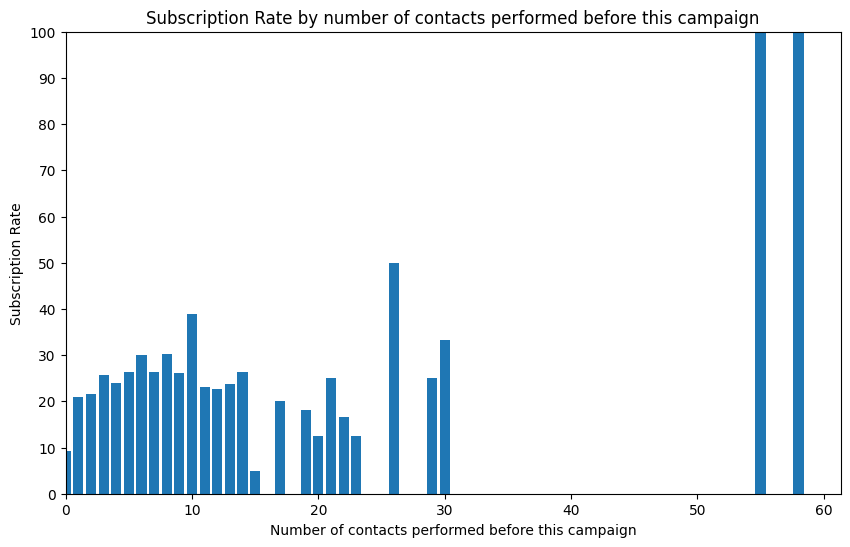

In [81]:
# group the data by previous and calculate the total number of subscription in each group
previous_sub_rate = bank_data.groupby('previous')['subscription_binary'].mean() * 100

# create the chart
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# plot the bars
ax.bar(previous_sub_rate.index, previous_sub_rate.values)

ax.set_xlabel('Number of contacts performed before this campaign')
ax.set_ylabel('Subscription Rate')
plt.title('Subscription Rate by number of contacts performed before this campaign')

# set y-axis to display only integer values
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlim(left=0)
ax.set_ylim([0, 100])

plt.show()

 The chart shows no positive correlation between the number of contacts performed before this campaign and subscription rate

### 8.8 Any relationship between subscription rate and poutcome?

In [82]:
bank_data.poutcome.value_counts()

unknown    36959
failure     4901
other       1839
success     1511
Name: poutcome, dtype: int64

The chart shows that clients who subscribe the term deposit in the previous marketing campaign are more likely to subscribe during this campaign

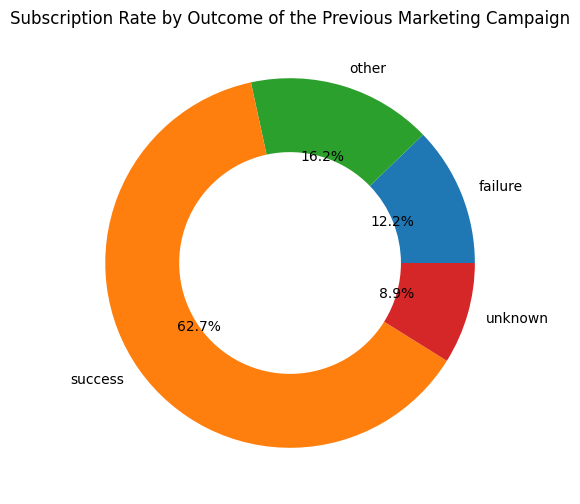

In [83]:
# group the data by poutcome and calculate the mean of subscription rate in each group
poutcome_sub_rate = bank_data.groupby('poutcome')['subscription_binary'].mean() * 100

# define the colors for the bars
colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']

# create the chart
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# plot the bars with different colors
wedges, _, _ = ax.pie(poutcome_sub_rate.values, colors=colors, labels=poutcome_sub_rate.index,
                      wedgeprops=dict(width=0.4), autopct='%1.1f%%')


# add title
plt.title('Subscription Rate by Outcome of the Previous Marketing Campaign')

plt.show()




In [84]:
bank_data.to_csv('bank_final.csv')